<div class="alert alert-block alert-success">

# **Imports**

<div>

In [ ]:
from utils import *

In [ ]:
# Read the CSV files
artists = pd.read_csv("artists.csv", index_col=0)
conflicts_matrix = pd.read_csv("conflicts.csv", index_col=0)

In [2]:
conflicts_matrix = conflicts_matrix.to_numpy()

In [3]:
artists_sorted = artists.sort_values('popularity', ascending=False)

<div class="alert alert-block alert-success">

# **Popularity**
<div>

<BarContainer object of 35 artists>

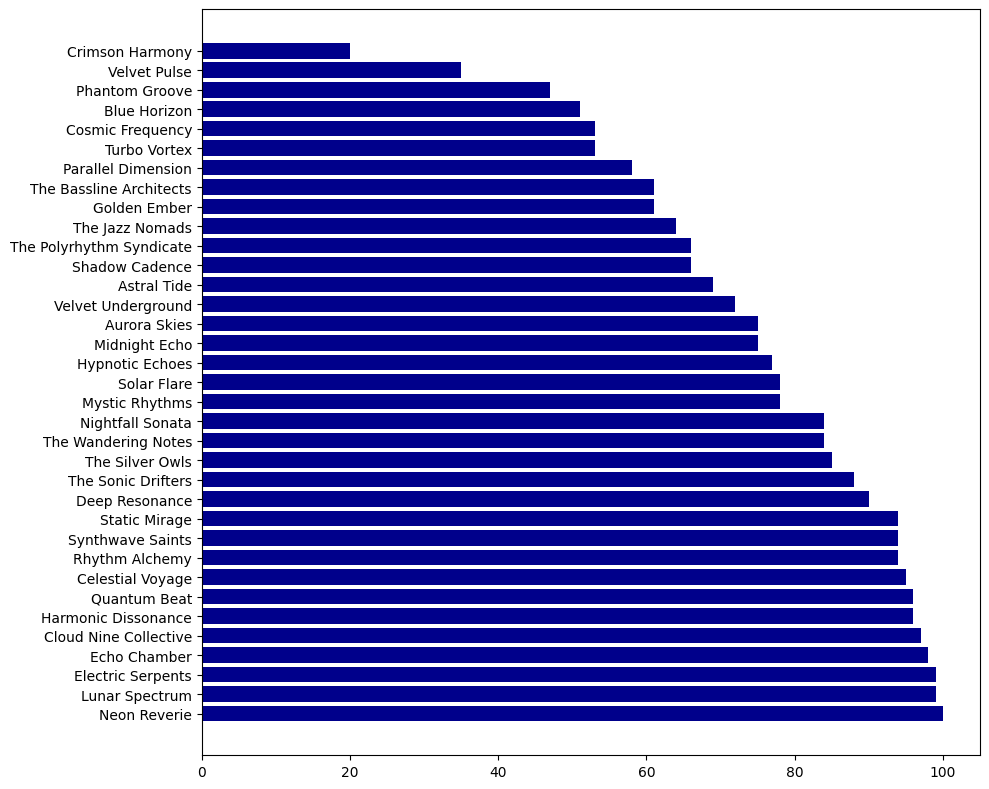

In [4]:
plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(artists_sorted['name'], artists_sorted['popularity'], color='darkblue')

<div class="alert alert-block alert-success">

# **Genre**

<div>

In [5]:
genre_counts = artists['genre'].value_counts()

<BarContainer object of 6 artists>

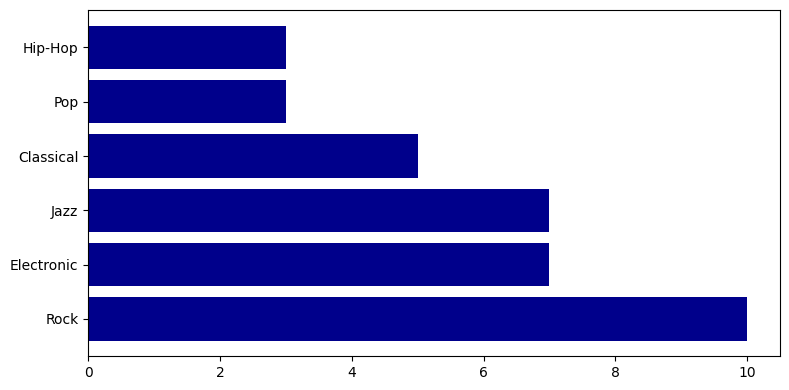

In [6]:
plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(genre_counts.index, genre_counts.values, color='darkblue')

<div class="alert alert-block alert-success">

# **Conflicts**

<div>

In [7]:
conflicts = []

for i in range(conflicts_matrix.shape[0]):
    for j in range(conflicts_matrix.shape[1]):
        if i < j and conflicts_matrix[i][j] > 0:
            conflicts.append((i, j, conflicts_matrix[i][j]))

conflicts_sorted = sorted(conflicts, key=lambda x: x[2], reverse=True)

from collections import Counter

all_artists = []

for i, j, _ in conflicts_sorted:
    all_artists.extend([i, j]) 

conflict_counts = Counter(all_artists)

most_conflicted = conflict_counts.most_common()  


In [8]:
names = [artists['name'][artist_idx] for artist_idx, count in most_conflicted]
counts = [count for artist_idx, count in most_conflicted]

<BarContainer object of 35 artists>

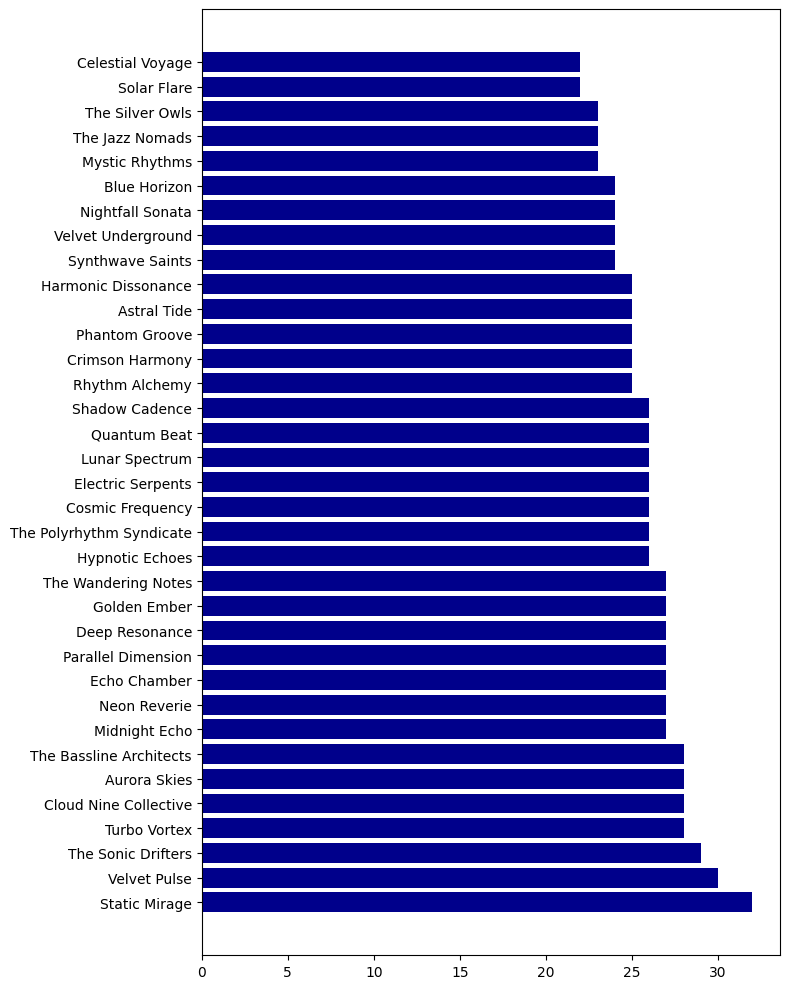

In [9]:
plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(names, counts, color='darkblue')